In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There is no "NaN"in the data

### The data type corresponds with the features.

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### bmi and age are normally distributed because the mean values are close to 50% of the data (median).
### charge is skewness 

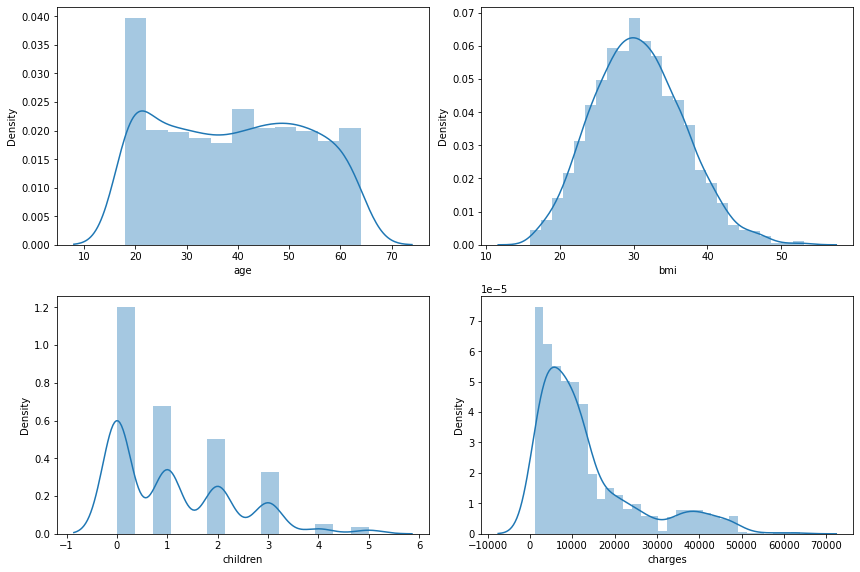

In [6]:
i =1
plt.figure(figsize=(12,8))
for col in data.columns:
    if data[col].dtype!='object':
        plt.subplot(2,2,i)
        sns.distplot(data[col])
        i+=1
plt.tight_layout(pad=0.9)
plt.show()

In [7]:
data.duplicated().sum()

1

In [8]:
data.duplicated('charges').sum()

1

In [9]:
data = data.drop_duplicates('charges')

In [10]:
data.shape

(1337, 7)

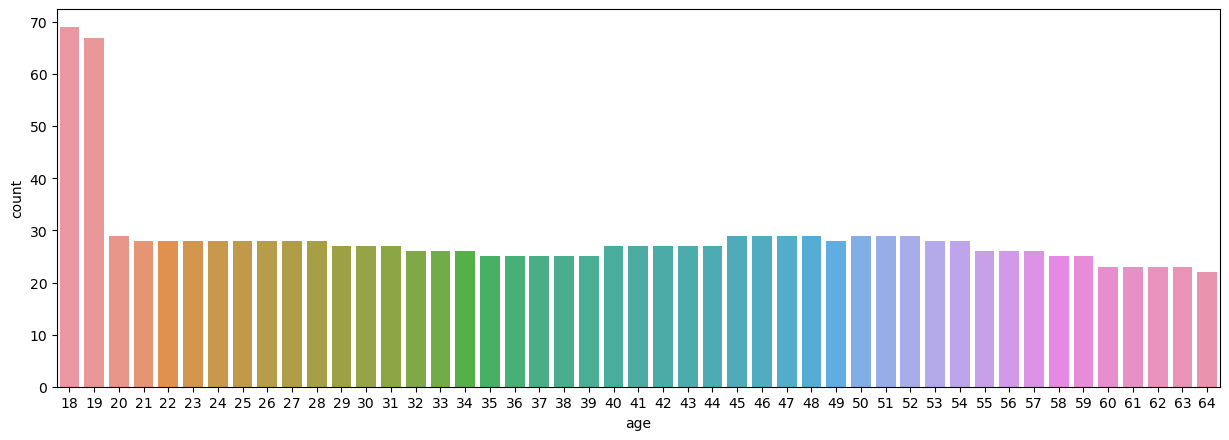

In [11]:
plt.figure(figsize=(15,5),dpi=100)
sns.countplot(data=data,x='age');

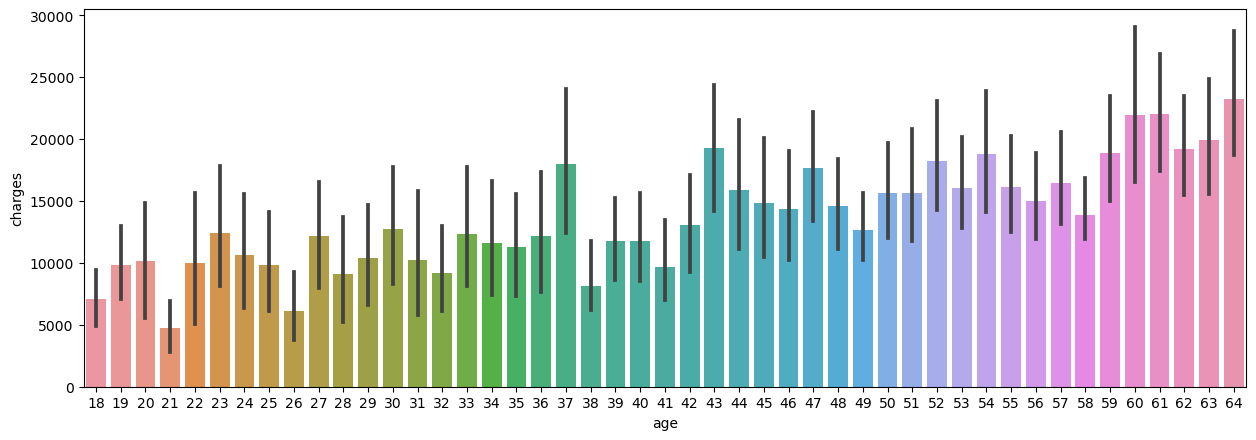

In [12]:
plt.figure(figsize=(15,5),dpi=100)
sns.barplot(data=data,x='age',y='charges');

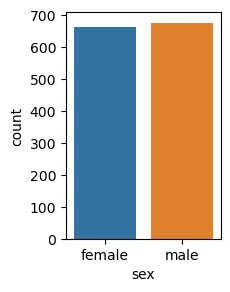

In [13]:
plt.figure(figsize=(2,3),dpi=100)
sns.countplot(data=data,x='sex');

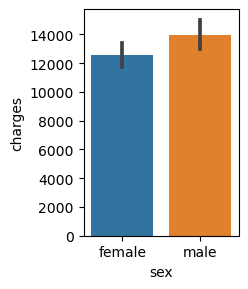

In [14]:
plt.figure(figsize=(2,3),dpi=100)
sns.barplot(data=data,x='sex',y='charges');

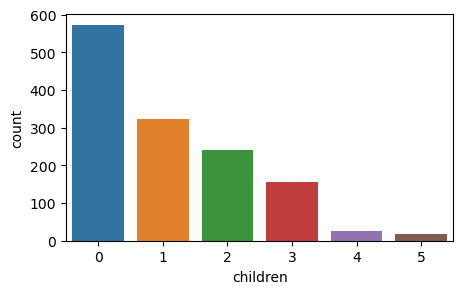

In [15]:
plt.figure(figsize=(5,3),dpi=100)
sns.countplot(data=data,x='children');

In [16]:
a = (data['children']==0).sum()
a

573

In [17]:
a/len(data)*100

42.857142857142854

In [18]:
b =data.loc[data['children']==0]
b

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
9,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
b['age'].value_counts()

18    51
19    49
24    23
58    21
60    19
22    18
63    17
20    17
56    16
62    16
57    16
21    16
61    15
27    14
23    13
55    13
64    13
25    12
53    10
42    10
48    10
59    10
52    10
51    10
36    10
28    10
26    10
45     9
50     9
29     9
54     8
31     8
33     8
37     7
32     7
49     7
34     7
44     6
43     6
41     5
46     5
30     5
39     4
38     4
40     4
47     4
35     2
Name: age, dtype: int64

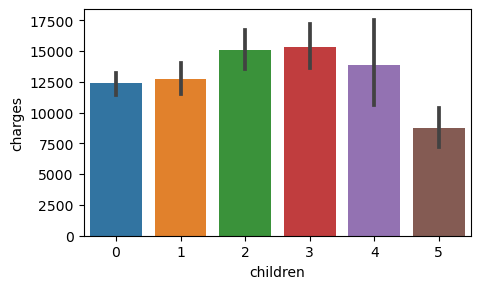

In [20]:
plt.figure(figsize=(5,3),dpi=100)
sns.barplot(data=data,x='children',y='charges');

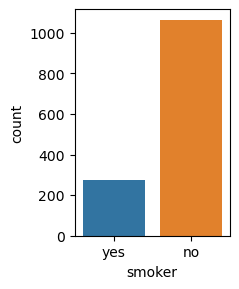

In [21]:
plt.figure(figsize=(2,3),dpi=100)
sns.countplot(data=data,x='smoker');

In [22]:
a = (data['smoker']=='no').sum()
a

1063

In [23]:
a/len(data)*100

79.50635751682871

### 22.3% smokers in the world

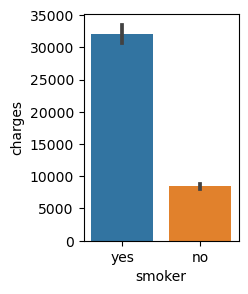

In [24]:
plt.figure(figsize=(2,3),dpi=100)
sns.barplot(data=data,x='smoker',y='charges');

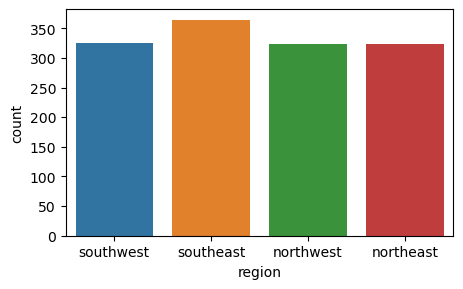

In [25]:
plt.figure(figsize=(5,3),dpi=100)
sns.countplot(data=data,x='region');

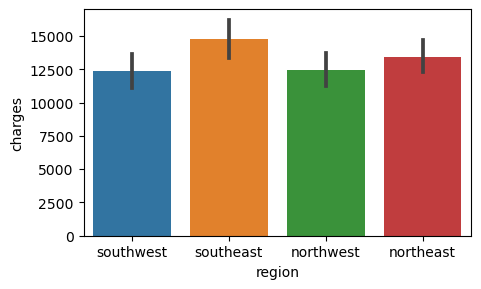

In [26]:
plt.figure(figsize=(5,3),dpi=100)
sns.barplot(data=data,x='region',y='charges');

<AxesSubplot:>

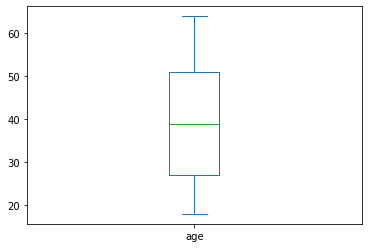

In [27]:
data['age'].plot(kind= 'box')

<AxesSubplot:>

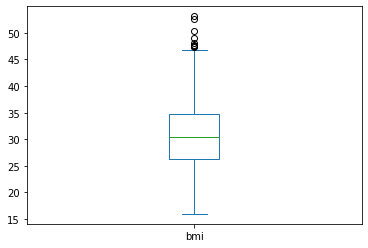

In [28]:
data['bmi'].plot(kind= 'box')

<AxesSubplot:>

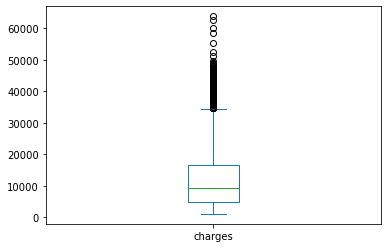

In [29]:
data['charges'].plot(kind= 'box')

# preprocessing 

In [30]:
data['smoker'].replace({'yes':1, 'no':0}, inplace = True)
data['smoker'] = pd.to_numeric(data['smoker'])

In [31]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [32]:
data.sex = lbl.fit_transform(data.sex)

In [33]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int32  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   uint8  
 7   region_southeast  1337 non-null   uint8  
 8   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 104.1 KB


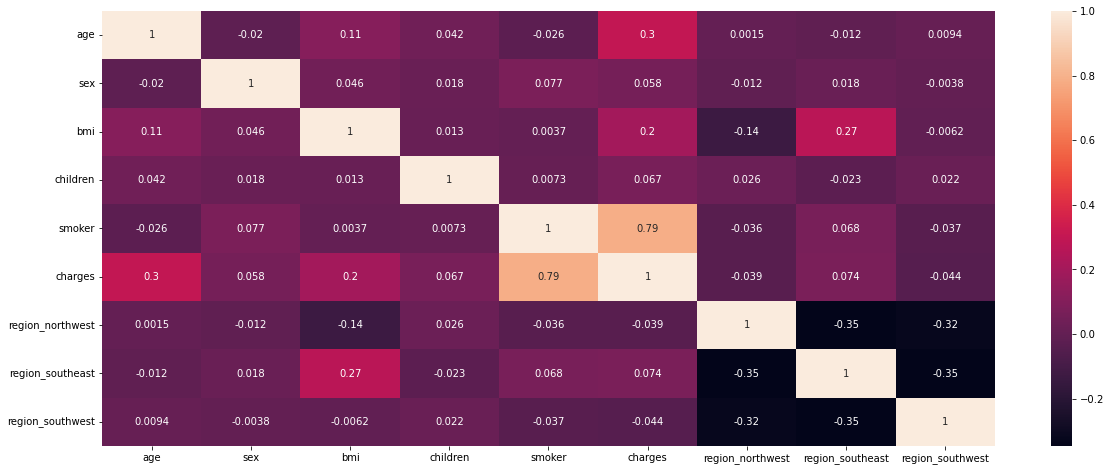

In [35]:
plt.figure(figsize=(20,8))

sns.heatmap(data.corr(), annot=True)
plt.show()

In [36]:
data.corr()['charges'].sort_values()

region_southwest   -0.043637
region_northwest   -0.038695
sex                 0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker              0.787234
charges             1.000000
Name: charges, dtype: float64

# correlation

In [37]:
data.shape

(1337, 9)

In [38]:
x = data.drop('charges', axis=1).values
y = data['charges'].values

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model=  RandomForestRegressor()
model.fit(train_x, train_y)  #train model

RandomForestRegressor()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
y_pred_tr = model.predict(train_x)        # علشان نعرف فيه اوفر او اندر فيت
print('MSE on Train :', np.sqrt(mean_squared_error(train_y, y_pred_tr)))
print('R2 on train :', model.score(train_x, train_y))
y_pred = model.predict(test_x)
print('MSE on test :', np.sqrt(mean_squared_error(test_y, y_pred)))
print('R2 on test :', model.score(test_x, test_y))

MSE on Train : 1888.7520807260894
R2 on train : 0.97532149446658
MSE on test : 4705.006826867641
R2 on test : 0.8566842087746526


In [44]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[40,50,60,70,80,90,100,110],
        'min_samples_split':[2,3,4,5,6,7,8],
        'max_depth': [3,4,5,6,7,8]}

In [45]:
rf = RandomForestRegressor()

In [46]:
grid_s = GridSearchCV(estimator=rf, param_grid = param, cv = 5, scoring='neg_mean_squared_error')
grid_s.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110]},
             scoring='neg_mean_squared_error')

In [47]:
grid_s.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 40}

In [48]:
model = RandomForestRegressor(**grid_s.best_params_)
model.fit(train_x, train_y)
Y_pred_tr = model.predict(train_x)
print('MSE on Train :', np.sqrt(mean_squared_error(train_y, y_pred_tr)))
print('R2 on train :', model.score(train_x, train_y))
y_pred = model.predict(test_x)
print('MSE on test :', np.sqrt(mean_squared_error(test_y, y_pred)))
print('R2 on test :', model.score(test_x, test_y))

MSE on Train : 1888.7520807260894
R2 on train : 0.8722233435583903
MSE on test : 4271.1992822673865
R2 on test : 0.8818936631959329
